In [4]:
# Importiere die benötigten Bibliotheken
import os  # Modul für Betriebssystem-spezifische Funktionalitäten

import pandas as pd  # Bibliothek für Datenmanipulation und Analyse
import numpy as np  # Bibliothek für numerische Berechnungen

import matplotlib.pyplot as plt  # Bibliothek zur Erstellung von Diagrammen und Visualisierungen
import seaborn as sns  # Erweiterung für Matplotlib zur Verbesserung der Visualisierungen

# Importiere die notwendigen Module für die Datenaufbereitung und Modellierung
from sklearn.impute import SimpleImputer  # Modul für die Behandlung von fehlenden Werten
from sklearn.preprocessing import OneHotEncoder  # Modul für die One-Hot-Encoding Transformation
from sklearn.compose import ColumnTransformer  # Modul zur Transformation von Spalten
from sklearn.pipeline import Pipeline  # Modul für die Erstellung von Datenpipelines
from sklearn.ensemble import RandomForestClassifier  # Zufallsforst-Klassifikator
from sklearn.model_selection import cross_val_score  # Modul zur Durchführung der Kreuzvalidierung


In [5]:
# Lese das Trainingsdatenset aus der Datei "train.csv" ein
train_df = pd.read_csv("train.csv")

# Lese das Testdatenset aus der Datei "test.csv" ein
test_df = pd.read_csv("test.csv")


In [6]:
# Gibt die erste Zeilen aus "train_df" aus
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Gibt die erste Zeilen aus "test_df" aus
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Missing values

In [8]:
def plot_missing_data(dataset, title):
    """
    Diese Funktion visualisiert fehlende Daten in einem Datensatz.

    Args:
        dataset (pandas.DataFrame): Der Datensatz, der visualisiert werden soll.
        title (str): Der Titel der Visualisierung.

    Returns:
        None
    """
    # Erstelle eine neue Figur mit einem Achsenobjekt
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Setze den Titel der Visualisierung
    plt.title(title)  
    
    # Erstelle eine Heatmap, die True für fehlende Werte und False für vorhandene Werte anzeigt
    sns.heatmap(dataset.isnull(), cbar=False)


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


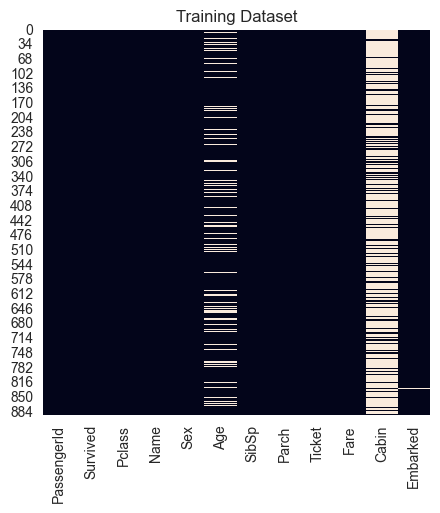

In [10]:
plot_missing_data(train_df, "Training Dataset")

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


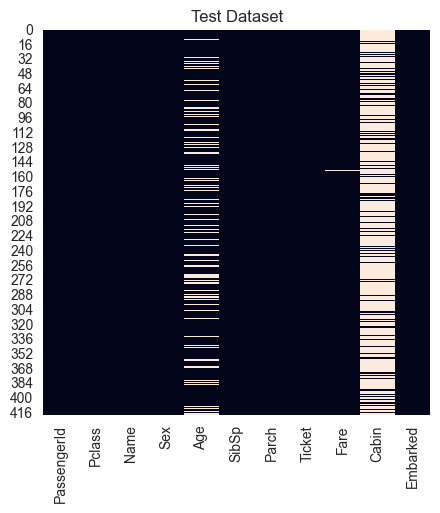

In [12]:
plot_missing_data(test_df, "Test Dataset")

In [13]:
def bar_chart_stacked(dataset, feature, stacked=True):
    """
    Diese Funktion erstellt ein gestapeltes oder nebeneinander angeordnetes Balkendiagramm.

    Args:
        dataset (pandas.DataFrame): Der Datensatz, der verwendet werden soll.
        feature (str): Die Spalte, die auf dem Diagramm dargestellt werden soll.
        stacked (bool, optional): Gibt an, ob das Diagramm gestapelt sein soll. Standardmäßig True.

    Returns:
        None
    """
    # Filtert die Datensätze für überlebende und verstorbene Passagiere
    survived = dataset[dataset["Survived"] == 1][feature].value_counts()
    dead = dataset[dataset["Survived"] == 0][feature].value_counts()
    
    # Erstellt ein DataFrame, in dem die überlebenden und verstorbenen Passagiere als Zeilen und die eindeutigen Werte der Funktion als Spalten angezeigt werden
    df_survived_dead = pd.DataFrame([survived, dead])
    
    # Setzt die Indexlabels für bessere Visualisierung
    df_survived_dead.index = ["Passengers Survived", "Passengers Died"]
    
    # Erstellt ein gestapeltes oder nebeneinander angeordnetes Balkendiagramm, abhängig vom Wert von 'stacked'
    ax = df_survived_dead.plot(kind="bar", stacked=stacked, figsize=(5, 5))


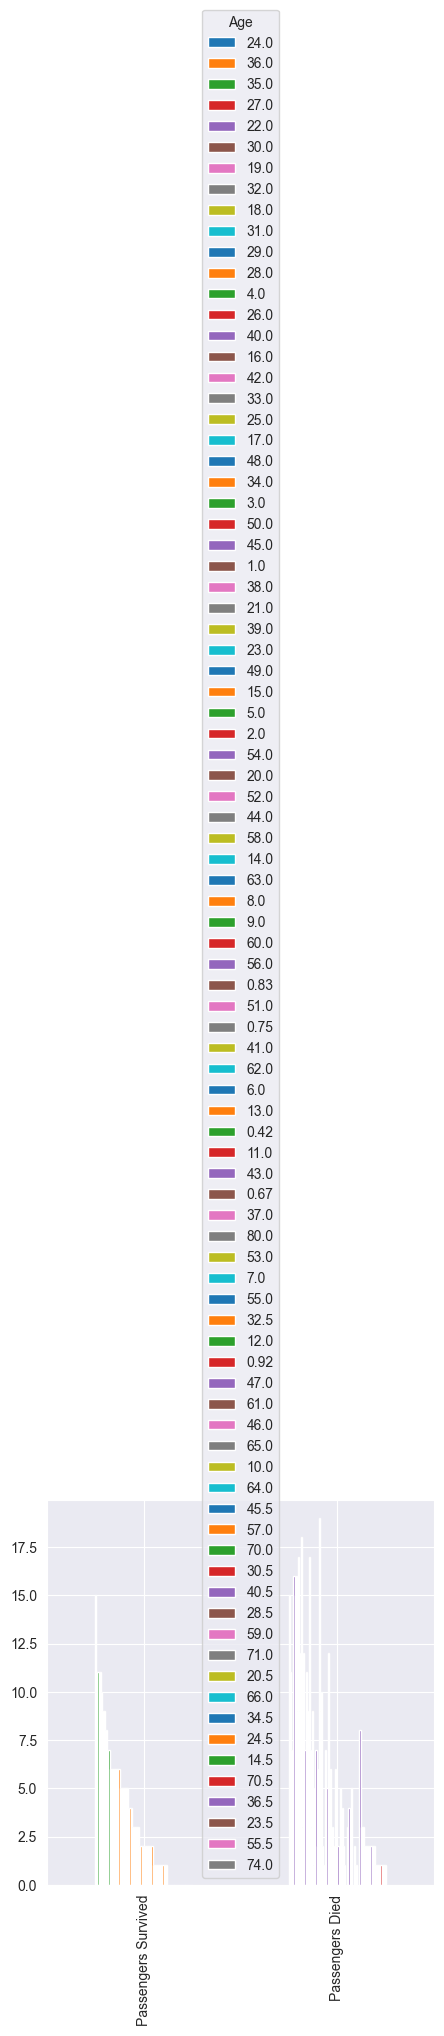

In [47]:
bar_chart_stacked(train_df, 'Age', stacked=False)

## Analyse Feature Survived

In [15]:
# Zählt die Anzahl der überlebenden (1) und nicht überlebenden (0) Passagiere
train_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [16]:
# Gibt den prozentualen Anteil der überlebenden (1) und nicht überlebenden (0) Passagiere zurück
train_df["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

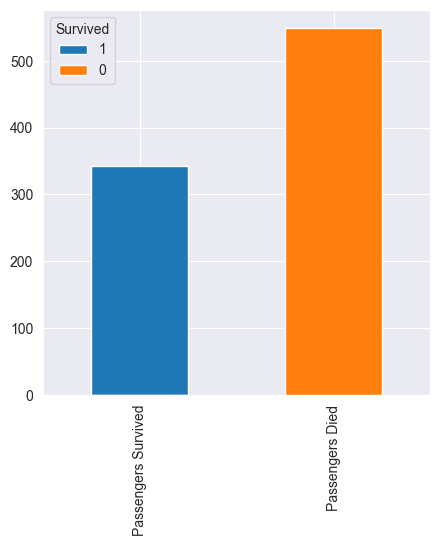

In [17]:
bar_chart_stacked(train_df, "Survived")

## Analyse Feature Sex

In [18]:
# Zählt die Anzahl der männlichen und weiblichen Passagiere und gibt sie als DataFrame zurück
train_df["Sex"].value_counts().to_frame()

,count
Sex,
male,577
female,314


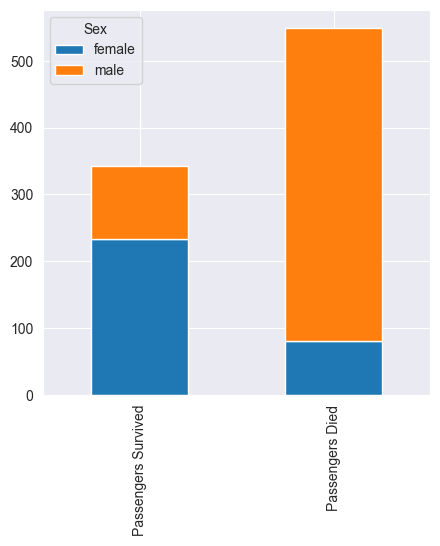

In [19]:
bar_chart_stacked(train_df, "Sex")

In [20]:
# Berechnet den prozentualen Anteil der überlebenden Passagiere nach Geschlecht
train_df.groupby("Sex").Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

## Analyse Feature Pclass

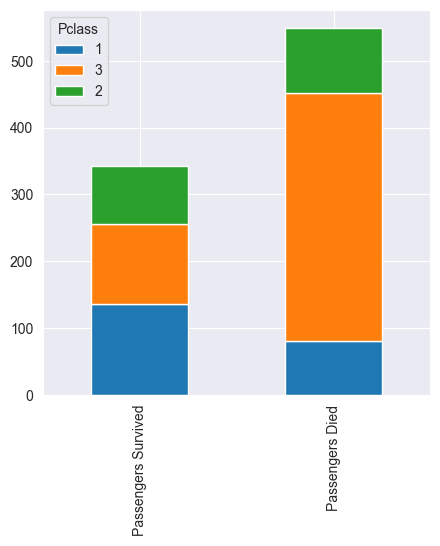

In [21]:
bar_chart_stacked(train_df, "Pclass")

In [22]:
# Erstellt eine Pivot-Tabelle, um die Anzahl der Tickets nach Klasse und Überlebensstatus anzuzeigen
pd.pivot_table(train_df, index = "Survived", columns = "Pclass", values = "Ticket" ,aggfunc ="count")

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [23]:
# Berechnet den prozentualen Anteil der überlebenden Passagiere nach Klasse und gibt sie als DataFrame zurück
train_df.groupby(["Pclass"]).Survived.mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [24]:
def bar_chart_compare(dataset, feature1, feature2=None, title="Survival rate by sex and class"):
    """
    Erstellt einen Balkendiagramm-Vergleich der Überlebensraten basierend auf den angegebenen Merkmalen.

    Args:
        dataset (DataFrame): Der Datensatz, der analysiert werden soll.
        feature1 (str): Das erste Merkmal, das auf der x-Achse dargestellt wird.
        feature2 (str, optional): Das zweite Merkmal, das durch die Farbe im Balkendiagramm dargestellt wird. Default ist None.
        title (str, optional): Der Titel des Diagramms. Default ist "Überlebensrate nach Geschlecht und Klasse".
    """
    # Größe des Diagramms festlegen
    plt.figure(figsize=[5, 5])

    # Titel setzen
    plt.title(title)

    # Balkendiagramm erstellen
    g = sns.barplot(x=feature1, y="Survived", hue=feature2, ci=None, data=dataset).set_ylabel("Survival rate")


C:\Users\bbind\AppData\Local\Temp\ipykernel_3180\2887581085.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x=feature1, y="Survived", hue=feature2, ci=None, data=dataset).set_ylabel("Survival rate")
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

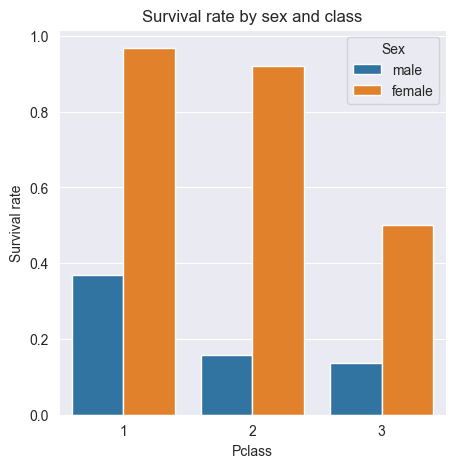

In [25]:
bar_chart_compare(train_df, "Pclass", "Sex")

In [26]:
# Erstellt eine Pivot-Tabelle, um die Anzahl der Tickets nach Überlebensstatus, Klasse und Geschlecht anzuzeigen
pd.pivot_table(train_df, index = "Survived", columns = ["Pclass", "Sex"], values = "Ticket" ,aggfunc ="count")

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   77      6   91     72  300
1            91   45     70   17     72   47

In [27]:
# Berechnet den prozentualen Anteil der überlebenden Passagiere nach Klasse und Geschlecht und gibt sie als DataFrame zurück
train_df.groupby(["Pclass", "Sex"]).Survived.mean().to_frame()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

## Analyse Feature Age

In [28]:
def plot_distribution(dataset, feature, title, bins=30, hist=True, fsize=(5,5)):
    """
    Stellt die Verteilung eines Merkmals in einem Datensatz dar.

    Args:
        dataset (DataFrame): Der Datensatz, der analysiert werden soll.
        feature (str): Das Merkmal, dessen Verteilung dargestellt werden soll.
        title (str): Der Titel des Diagramms.
        bins (int, optional): Die Anzahl der Bins für das Histogramm. Default ist 30.
        hist (bool, optional): Gibt an, ob ein Histogramm dargestellt werden soll. Default ist True.
        fsize (tuple, optional): Die Größe des Diagramms. Default ist (5, 5).
    """
    # Erstellt ein Subplot mit angegebener Größe
    fig, ax = plt.subplots(figsize=fsize)
    
    # Setzt den Titel
    ax.set_title(title)
    
    # Zeichnet die Verteilung
    sns.distplot(dataset[feature], color="g", bins=bins, hist=hist, ax=ax)

In [29]:
def plot_kernel_density_estimate_survivors(dataset, feature1, title, fsize=(5,5)):
    """
    Stellt die Kern-Dichteschätzung (KDE) für ein bestimmtes Merkmal in Bezug auf Überlebende und Verstorbene dar.

    Args:
        dataset (DataFrame): Der Datensatz, der analysiert werden soll.
        feature1 (str): Das Merkmal, dessen KDE dargestellt werden soll.
        title (str): Der Titel des Diagramms.
        fsize (tuple, optional): Die Größe des Diagramms. Default ist (5, 5).
    """
    # Erstellt ein Subplot mit angegebener Größe
    fig, ax = plt.subplots(figsize=fsize)
    
    # Setzt den Titel
    ax.set_title(title) 
    
    # Zeichnet die KDE für überlebende Passagiere
    sns.kdeplot(dataset[feature1].loc[train_df["Survived"] == 1], shade=True, ax=ax, label="Survived").set_xlabel(feature1)
    
    # Zeichnet die KDE für verstorbene Passagiere
    sns.kdeplot(dataset[feature1].loc[train_df["Survived"] == 0], shade=True, ax=ax, label="Died")

C:\Users\bbind\AppData\Local\Temp\ipykernel_3180\79293622.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color="g", bins=bins, hist=hist, ax=ax)
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf v

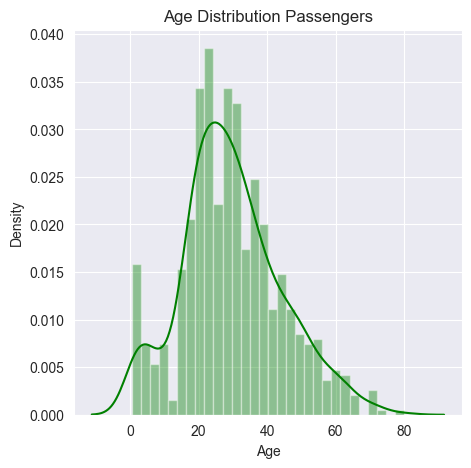

In [30]:
# Funktion zur Darstellung der Altersverteilung der Passagiere
plot_distribution(train_df, "Age", "Age Distribution Passengers")

C:\Users\bbind\AppData\Local\Temp\ipykernel_3180\2136621303.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[feature1].loc[train_df["Survived"] == 1], shade=True, ax=ax, label="Survived").set_xlabel(feature1)
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bbind\AppData\Local\Temp\ipykernel_3180\2136621303.py:21: FutureWarning: 


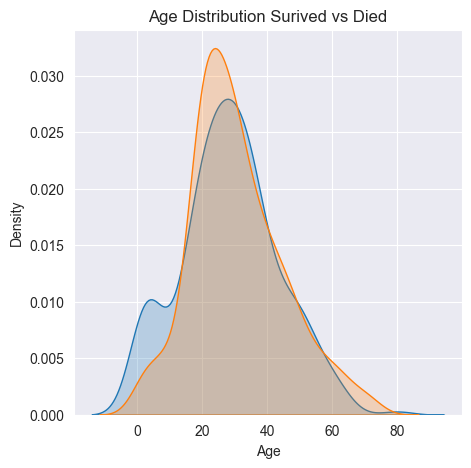

In [31]:
plot_kernel_density_estimate_survivors(train_df, "Age", "Age Distribution Surived vs Died")

## Analyse Feature Age & Sex 

In [32]:
def plot_swarm_survivors(dataset, feature1, feature2, title, fsize=(15, 5)):
    """
    Erstellt ein Schwarmdiagramm zur Darstellung der Verteilung von zwei Merkmalen in Bezug auf Überlebende und Verstorbene.

    Args:
        dataset (DataFrame): Der Datensatz, der analysiert werden soll.
        feature1 (str): Das erste Merkmal, das auf der y-Achse dargestellt wird.
        feature2 (str): Das zweite Merkmal, das auf der x-Achse dargestellt wird.
        title (str): Der Titel des Diagramms.
        fsize (tuple, optional): Die Größe des Diagramms. Default ist (15, 5).
    """
    # Erstellt ein Subplot mit angegebener Größe
    fig, ax = plt.subplots(figsize=fsize)
    
    # Aktiviert das Raster nur auf der linken Achse
    ax.grid(True)
    
    # Setzt die x-Achsen-Ticks
    plt.xticks(list(range(0, 100, 2)))
    
    # Erstellt das Schwarmdiagramm
    sns.swarmplot(y=feature1, x=feature2, hue="Survived", data=dataset).set_title(title)

C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

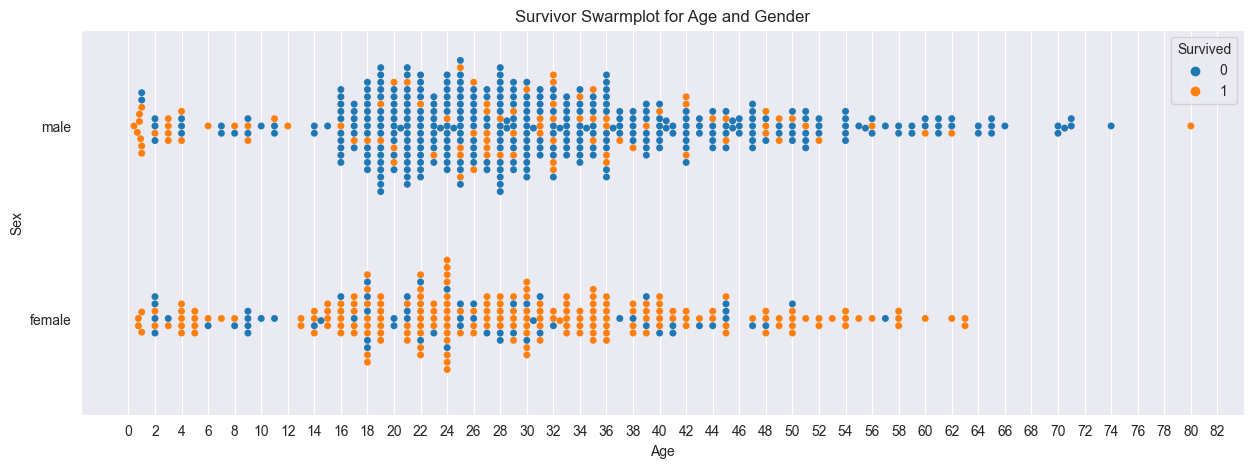

In [33]:
# Funktion zur Darstellung eines Schwarmdiagramms zur Verteilung von Alter und Geschlecht in Bezug auf Überlebende und Verstorbene
plot_swarm_survivors(train_df, "Sex", "Age", "Survivor Swarmplot for Age and Gender")

## Analyse Features Age and Pclass 

C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

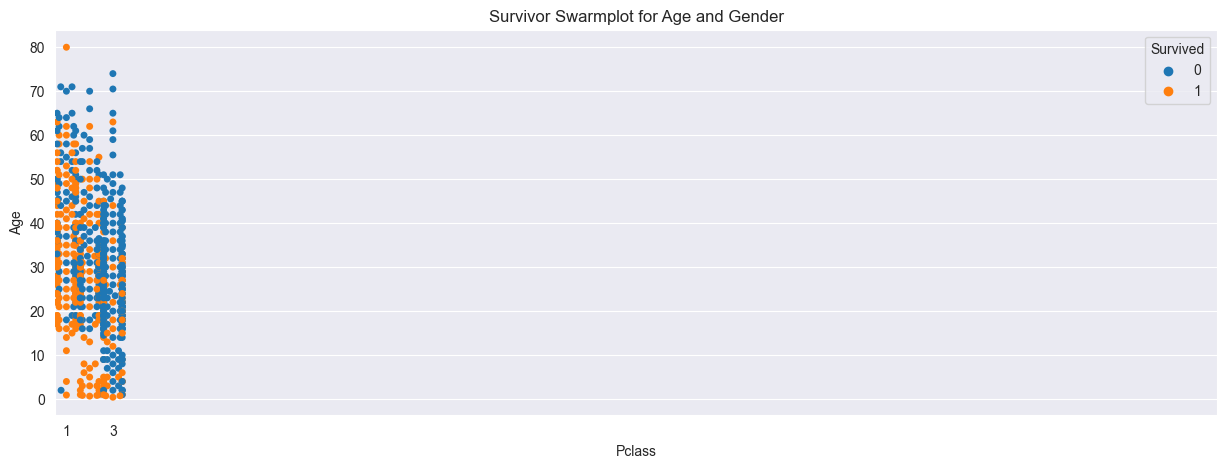

In [34]:
# Funktion zur Darstellung eines Schwarmdiagramms zur Verteilung von Alter und Klasse in Bezug auf Überlebende und Verstorbene
plot_swarm_survivors(train_df, "Age", "Pclass", "Survivor Swarmplot for Age and Gender")

## Analyse Feature Fare

In [35]:
train_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

C:\Users\bbind\AppData\Local\Temp\ipykernel_3180\79293622.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], color="g", bins=bins, hist=hist, ax=ax)
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf v

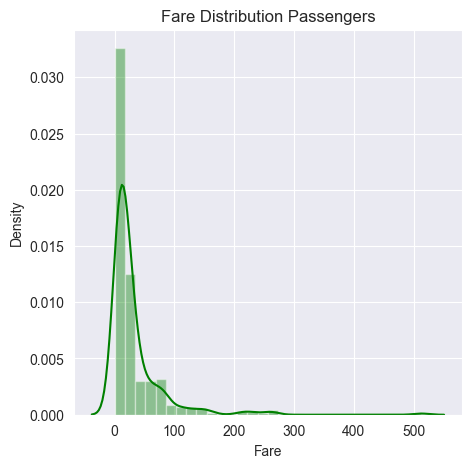

In [36]:
# Funktion zur Darstellung der Verteilung der Ticketpreise der Passagiere
plot_distribution(train_df, "Fare", "Fare Distribution Passengers")

In [37]:
# Funktion zur Darstellung der Überlebensrate in Abhängigkeit von Quartilen eines Merkmals
def plot_quartiles(dataset, feature, title, categories):
    """
    Diese Funktion erstellt ein Balkendiagramm, das die Überlebensrate in Abhängigkeit von Quartilen eines Merkmals zeigt.

    Args:
        dataset (pandas.DataFrame): Der Datensatz, der verwendet werden soll.
        feature (str): Das Merkmal, das in Quartile unterteilt werden soll.
        title (str): Der Titel des Balkendiagramms.
        categories (list): Die Anzahl der Kategorien bzw. Quartile.

    Returns:
        None
    """
    fig, axarr = plt.subplots(figsize=(5, 5))
    
    # Unterteilt das Merkmal in Quartile und weist jedem Quartil eine Kategorie zu
    fare_ranges = pd.qcut(dataset[feature], len(categories), labels=categories)
    
    axarr.set_title(title)
    
    # Erstellt ein Balkendiagramm, das die Überlebensrate in Abhängigkeit von den Quartilen des Merkmals zeigt
    sns.barplot(x=fare_ranges, y=dataset.Survived, ci=None, ax=axarr).set_ylabel("Survival rate")

C:\Users\bbind\AppData\Local\Temp\ipykernel_3180\407955641.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=fare_ranges, y=dataset.Survived, ci=None, ax=axarr).set_ylabel("Survival rate")
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


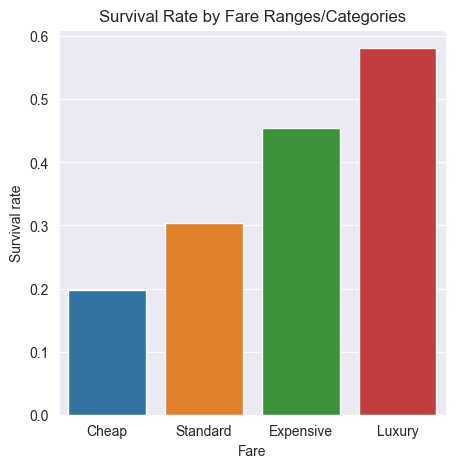

In [38]:
# Funktion zur Darstellung der Überlebensrate in Abhängigkeit von benutzerdefinierten Kategorien der Ticketpreise
plot_quartiles(train_df, "Fare", "Survival Rate by Fare Ranges/Categories", categories=["Cheap", "Standard", "Expensive", "Luxury"])

C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

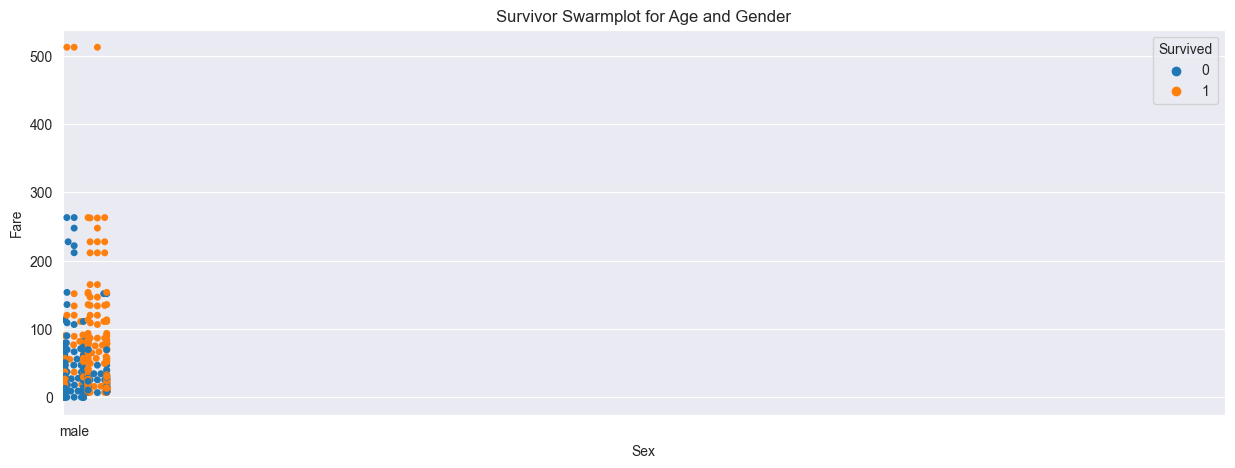

In [39]:
# Funktion zur Darstellung eines Schwarmdiagramms zur Verteilung von Ticketpreis und Geschlecht in Bezug auf Überlebende und Verstorbene
plot_swarm_survivors(train_df, "Fare", "Sex","Survivor Swarmplot for Age and Gender")

In [40]:
# Anzeigen der Passagiere mit einem Ticketpreis von 0
train_df.loc[train_df.Fare==0] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [41]:
# Anzahl der Passagiere mit einem Ticketpreis von 0
len(train_df.loc[train_df.Fare==0])

15

In [42]:
# Setzt den Ticketpreis auf NaN für alle Passagiere im Trainingsdatensatz, deren Ticketpreis 0 ist
train_df.loc[train_df["Fare"] == 0, "Fare"] = np.NaN

# Setzt den Ticketpreis auf NaN für alle Passagiere im Testdatensatz, deren Ticketpreis 0 ist
test_df.loc[test_df["Fare"] == 0, "Fare"] = np.NaN

## Analyse Feature Embarked

In [43]:
# Funktion zur Anzeige eines Countplots für die Häufigkeit eines Merkmals
def show_countplot(dataset, feature, title, fsize=(5,5)):
    """
    Zeigt ein Countplot für die Häufigkeit eines Merkmals im Datensatz an.

    Args:
        dataset (DataFrame): Der Datensatz, der analysiert werden soll.
        feature (str): Das Merkmal, dessen Häufigkeit dargestellt werden soll.
        title (str): Der Titel des Diagramms.
        fsize (tuple, optional): Die Größe des Diagramms. Default ist (5, 5).
    """
    # Erstellt ein Subplot mit angegebener Größe
    fig, ax = plt.subplots(figsize=fsize)
    
    # Zeichnet das Countplot
    sns.countplot(dataset[feature], ax=ax).set_title(title)

# Funktion zur Anzeige eines vergleichenden Countplots für zwei Merkmale
def show_compare_countplot(dataset, feature1, feature2, title):
    """
    Zeigt ein vergleichendes Countplot für zwei Merkmale im Datensatz an.

    Args:
        dataset (DataFrame): Der Datensatz, der analysiert werden soll.
        feature1 (str): Das erste Merkmal, das auf der x-Achse dargestellt wird.
        feature2 (str): Das zweite Merkmal, das durch die Farbe im Countplot dargestellt wird.
        title (str): Der Titel des Diagramms.
    """
    # Erstellt ein Subplot mit einer festen Größe (5x5 Zoll)
    fig, ax = plt.subplots(figsize=(5,5))
    
    # Zeichnet das vergleichende Countplot
    p = sns.countplot(x=feature1, hue=feature2, data=dataset, ax=ax).set_title(title)


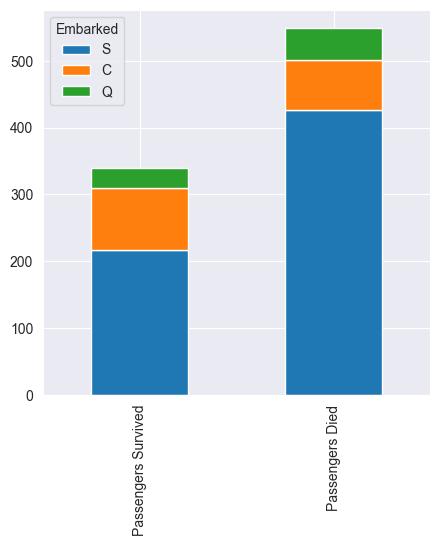

In [44]:
# Funktion zur Erstellung eines gestapelten Balkendiagramms für die Verteilung der Einschiffungshäfen
bar_chart_stacked(train_df, "Embarked")

In [48]:
train_df["Embarked"].value_counts().to_frame()

,count
Embarked,
S,644
C,168
Q,77


C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

AttributeError: 'numpy.int64' object has no attribute 'startswith'

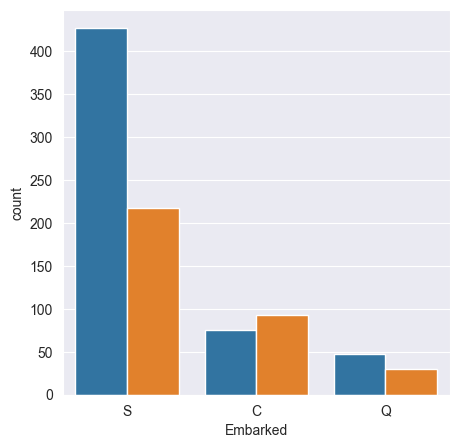

In [49]:
show_compare_countplot(train_df, "Embarked", "Survived", "Survivor count by place of embarktion")

In [ ]:
# Erstellt eine Pivot-Tabelle, um die Anzahl der Tickets nach Überlebensstatus und Embarked anzuzeigen
pd.pivot_table(train_df, index = "Survived", columns = "Embarked", values = "Ticket" ,aggfunc ="count")

In [ ]:
# Berechnet den prozentualen Anteil der überlebenden Passagiere nach Embarked und gibt sie als DataFrame zurück
train_df.groupby(["Embarked"]).Survived.mean().to_frame()

## Analyse Features Embarked & Pclass

In [ ]:
# Funktion zur Anzeige eines vergleichenden Countplots für Einschiffungshafen und Klasse
show_compare_countplot(train_df, "Embarked", "Pclass", "Passenger count by place of embarktion and class")

In [ ]:
# Berechnet die Anzahl der überlebenden Passagiere nach Embarked und Klasse und gibt sie als DataFrame zurück
train_df.groupby(["Embarked", "Pclass"]).Survived.sum().to_frame()

## Analyse Features Embarked & Sex

In [ ]:
# Funktion zur Anzeige eines vergleichenden Countplots für Embarked und Geschlecht
show_compare_countplot(train_df, "Embarked", "Sex", "Passenger count by place of embarktion and sex")

## Analyse Feature SibSp
"SibSp" ist die Anzahl der Geschwister oder Ehepartner einer Person an Bord der Titanic.

In [ ]:
train_df["SibSp"].value_counts().to_frame()

In [ ]:
bar_chart_compare(train_df, "SibSp", title = "Surival rate by siblings / spouses aboard the Titanic")

In [ ]:
train_df.groupby(["SibSp"]).Survived.mean().to_frame()

In [ ]:
show_countplot(train_df, "SibSp", "SibSp Distribution", (15,3))

In [ ]:
show_compare_countplot(train_df, "SibSp", "Survived", "Survivor count by number of siblings / spouses aboard the Titanic")

In [ ]:
show_countplot(train_df, "Parch", "Parch Distribution", (15,3))

In [ ]:
bar_chart_compare(train_df, "Parch", title = "Survival rate by Parch")

In [ ]:
# Berechnet den prozentualen Anteil der überlebenden Passagiere nach Anzahl der Eltern/Kinder an Bord und gibt sie als DataFrame zurück
train_df.groupby(["Parch"]).Survived.mean().to_frame()

In [ ]:
show_compare_countplot(train_df, "Parch", "Survived", "Survivor count by Parch")

## Feature engineering

# Feature Name

In [ ]:
pd.unique(train_df["Name"])

In [ ]:
# Extrahiert den Titel aus dem Namen und fügt ihn als neue Spalte hinzu
train_df["Title"] = train_df["Name"].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_df["Title"] = test_df["Name"].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [ ]:
train_df.head()

In [ ]:
train_df["Title"].value_counts().to_frame()

In [ ]:
# Ersetzt bestimmte Titelwerte durch standardisierte Werte in den DataFrames
# Für weibliche Titel
train_df["Title"].replace(["Mme", "Ms", "Lady", "Mlle", "the Countess", "Dona"], "Miss", inplace=True)
test_df["Title"].replace(["Mme", "Ms", "Lady", "Mlle", "the Countess", "Dona"], "Miss", inplace=True)

# Für männliche Titel
train_df["Title"].replace(["Major", "Col", "Capt", "Don", "Sir", "Jonkheer"], "Mr", inplace=True)
test_df["Title"].replace(["Major", "Col", "Capt", "Don", "Sir", "Jonkheer"], "Mr", inplace=True)

In [ ]:
show_countplot(train_df, "Title", "Title Distribution after substitution", (15,3))

In [ ]:
bar_chart_stacked(train_df, "Title") 

In [ ]:
bar_chart_compare(train_df, "Title", title = "Survival rate by Title")

## Cabin and Ticket

In [ ]:
train_df[["Cabin", "Ticket"]]

In [ ]:
# Führenden Buchstaben extrahieren:
train_df["Ticket_2letter"] = train_df.Ticket.apply(lambda x: x[:2])
test_df["Ticket_2letter"] = test_df.Ticket.apply(lambda x: x[:2])

In [ ]:
# Ticket Länge extrahieren:
train_df["Ticket_len"] = train_df.Ticket.apply(lambda x: len(x))
test_df["Ticket_len"] = test_df.Ticket.apply(lambda x: len(x))

In [ ]:
# Anzahl der Kabinen extrahieren:
train_df["Cabin_num"] = train_df.Ticket.apply(lambda x: len(x.split()))
test_df["Cabin_num"] = test_df.Ticket.apply(lambda x: len(x.split()))

In [ ]:
# Erste Buchstabe extrahieren:
train_df["Cabin_1letter"] = train_df.Ticket.apply(lambda x: x[:1])
test_df["Cabin_1letter"] = test_df.Ticket.apply(lambda x: x[:1])

#### Results:
Ticket:

In [ ]:
len(train_df["Ticket"].value_counts().to_frame())

In [ ]:
len(train_df["Ticket_2letter"].value_counts().to_frame())

In [ ]:
len(train_df["Ticket_len"].value_counts().to_frame())

In [ ]:
train_df.head()

#### Results:
Cabin:

In [ ]:
len(train_df["Cabin"].value_counts().to_frame())

In [ ]:
len(train_df["Cabin_num"].value_counts().to_frame())

In [ ]:
train_df["Cabin_num"].value_counts().to_frame()

In [ ]:
len(train_df["Cabin_1letter"].value_counts().to_frame())

In [ ]:
# Berechnet die Familiengröße für den Trainingsdatensatz und fügt sie als neue Spalte 'Fam_size' hinzu
train_df["Fam_size"] = train_df["SibSp"] + train_df["Parch"] + 1
# Berechnet die Familiengröße für den Testdatensatz und fügt sie als neue Spalte 'Fam_size' hinzu
test_df["Fam_size"] = test_df["SibSp"] + test_df["Parch"] + 1

In [ ]:
bar_chart_compare(train_df, "Fam_size", title = "Survival rate by family size")

In [ ]:
show_compare_countplot(train_df, "Fam_size", "Survived", "Survivor count by family size")

## Analyse Feature Family Type

In [ ]:
# Erstellung von vier Gruppen basierend auf der Familiengröße
train_df["Fam_type"] = pd.cut(train_df.Fam_size, [0,1,4,7,11], labels=["Solo", "Small", "Big", "Very big"])
test_df["Fam_type"] = pd.cut(test_df.Fam_size, [0,1,4,7,11], labels=["Solo", "Small", "Big", "Very big"])

In [ ]:
bar_chart_compare(train_df, "Fam_type", title = "Surival rate by family type")

In [ ]:
show_compare_countplot(train_df, "Fam_type", "Survived", "Survivor count by family type")

## Trainieren ein classifier

In [ ]:
# Definiere die Zielvariable y (Überlebensstatus)
y = train_df["Survived"]

# Definiere die ausgewählten Merkmale
features = ["Pclass", "Fare", "Title", "Embarked", "Fam_type", "Ticket_len", "Ticket_2letter"]

# Extrahiere die entsprechenden Daten für die Merkmale
X = train_df[features]

# Zeige die ersten Zeilen des Datensatzes an, um sicherzustellen, dass die Merkmale korrekt ausgewählt wurden
X.head()


In [ ]:
# Definiere die numerischen Merkmale und die kategorialen Merkmale
numerical_cols = ["Fare"]
categorical_cols = ["Pclass", "Title", "Embarked", "Fam_type", "Ticket_len", "Ticket_2letter"]

# Fülle fehlende numerische Werte mit dem Median
numerical_transformer = SimpleImputer(strategy="median")

# Fülle fehlende kategorische Werte mit dem häufigsten Wert und wende One-Hot-Encoding an
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Bündle die Vorverarbeitung für numerische und kategoriale Daten
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ])

# Bündle Vorverarbeitung und Modellierung
titanic_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=0, n_estimators=500, max_depth=5))
])

# Training
titanic_pipeline.fit(X, y)

# Ausgabe der Kreuzvalidierungsgenauigkeit
print("Kreuzvalidierungsgenauigkeit: {:.3f}".format(cross_val_score(titanic_pipeline, X, y, cv=10).mean()))

In [ ]:
# Extrahiere die entsprechenden Daten für die Merkmale aus dem Testdatensatz
X_test = test_df[features]

# Zeige die ersten Zeilen des Testdatensatzes an, um sicherzustellen, dass die Merkmale korrekt ausgewählt wurden
X_test.head()


In [ ]:
# Vorhersagen mit dem trainierten Modell
predictions = titanic_pipeline.predict(X_test)
predictions

In [ ]:
# Erstelle ein DataFrame mit den Vorhersagen und der entsprechenden PassengerId
output = pd.DataFrame({"PassengerId": test_df.PassengerId, "Survived": predictions})

# Speichere die Vorhersagen in einer CSV-Datei
output.to_csv("submission.csv", index=False)

# Gib eine Bestätigung aus, dass die Datei erfolgreich gespeichert wurde
print("Ihre submission.csv wurde erfolgreich gespeichert!")
